# Project: Wrangle and Analyze Data

In [173]:
import json
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import seaborn as sns
from scipy import stats
import tweepy

## Gather Data

#### Enhanced Twitter Archive Dataset

In [174]:
# Contains tweets with extra info already parsed from text
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [175]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Image predictions Dataset

In [176]:
# Predictions of dog breeds
url_image_predictions = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/'
                         '599fd2ad_image-predictions/image-predictions.tsv')

# Create dataframe from TSV
df_image_predictions = pd.read_csv(url_image_predictions, delimiter='\t')

In [177]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Twitter API Dataset

In [178]:
# Declare Twitter API keys and access tokens
consumer_key = '91Qdd1N5FLeO26Y9i2wCxdtaR'
consumer_secret = '8LWH5LwNHPfVZUhXvTNXH3xrx5NItovjuCV2oVF2M7LE92CINj'
access_token = '1058696180769656832-is19dnaItAHqkY3U3tmKtDy5lj0uvE'
access_secret = 'CF0GBRHEsGxyx4HUkm9UA2dBds2tJYvOPp0zWlY9uae9Y'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [ ]:
# Store data on tweet_json.txt
with open('tweet_json.txt', 'w') as outfile: 
    for tweet_id in df_twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id)
            # Convert to JSON and write
            json.dump(tweet._json, outfile)
            outfile.write("\n")
            
        except:  # could be the case the tweet was deleted
            print('ERROR: Error on tweet id {}'.format(tweet_id))
            e = os.sys.exc_info()[0]

ERROR: Error on tweet id 888202515573088257
ERROR: Error on tweet id 873697596434513921
ERROR: Error on tweet id 872668790621863937
ERROR: Error on tweet id 872261713294495745
ERROR: Error on tweet id 869988702071779329
ERROR: Error on tweet id 866816280283807744
ERROR: Error on tweet id 861769973181624320
ERROR: Error on tweet id 856602993587888130
ERROR: Error on tweet id 851953902622658560
ERROR: Error on tweet id 845459076796616705
ERROR: Error on tweet id 844704788403113984
ERROR: Error on tweet id 842892208864923648
ERROR: Error on tweet id 837366284874571778
ERROR: Error on tweet id 837012587749474308
ERROR: Error on tweet id 829374341691346946
ERROR: Error on tweet id 827228250799742977
ERROR: Error on tweet id 812747805718642688
ERROR: Error on tweet id 802247111496568832
ERROR: Error on tweet id 779123168116150273
ERROR: Error on tweet id 775096608509886464
ERROR: Error on tweet id 771004394259247104
ERROR: Error on tweet id 770743923962707968
ERROR: Error on tweet id 7616729

In [179]:
# Save only certain tweet elements in dataframe
elements_to_save = ['id', 'favorite_count', 'retweet_count']
# Later convert list to dataframe
data = []

with open('tweet_json.txt', 'r') as readfile: 
    # Read in JSON line and convert to dict
    tweet_json = readfile.readline()
    
    # Read line by line into DataFrame
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        # Create a smaller dict
        data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
        data.append(data_row)
        
        # Read in JSON line and convert to dict
        tweet_json = readfile.readline()
        
            
    
df_tweet_info = pd.DataFrame.from_dict(data)

## Assess Data

#### Enhanced Twitter Archive Dataset

In [180]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


df_twitter_archive columns:
- **tweet_id**: the unique identifier for each tweet
- **in_reply_to_status_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- **in_reply_to_user_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- **timestamp**: time when this Tweet was created
- **source**: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- **text**: actual UTF-8 text of the status update
- **retweeted_status_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- **retweeted_status_user_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- **retweeted_status_timestamp**: time of retweet
- **expanded_urls**: tweet URL
- **rating_numerator**: numerator of the rating of a dog. Note: ratings almost always greater than 10
- **rating_denominator**: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- **name**: name of the dog
- **doggo**: one of the 4 dog "stage"
- **floofer**: one of the 4 dog "stage"
- **pupper**: one of the 4 dog "stage"
- **puppo**: one of the 4 dog "stage"

In [181]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [182]:
df_twitter_archive[df_twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [183]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [184]:
df_twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Cilantro      1
Boston        1
Banjo         1
Chloe         1
Joshwa        1
Name: name, Length: 957, dtype: int64

In [185]:
# Check if there are any records in df_twitter_archive which are retweets
len(df_twitter_archive[df_twitter_archive.retweeted_status_id.isnull() == False])

181

In [186]:
# Sort by rating_denominator values
df_twitter_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [187]:
# Number of records whose both doggo and floofer columns are not None
len(df_twitter_archive[(df_twitter_archive.doggo != 'None') & (df_twitter_archive.floofer != 'None')])

1

In [188]:
# Number of records whose both doggo and pupper columns are not None
len(df_twitter_archive[(df_twitter_archive.doggo != 'None') & (df_twitter_archive.pupper != 'None')])

12

In [189]:
# Number of records whose both doggo and pupper columns are not None
len(df_twitter_archive[(df_twitter_archive.doggo != 'None') & (df_twitter_archive.puppo != 'None')])

1

In [190]:
# Number of records whose both floofer and pupper columns are not None
len(df_twitter_archive[(df_twitter_archive.floofer != 'None') & (df_twitter_archive.pupper != 'None')])

0

In [191]:
# Number of records whose both floofer and puppo columns are not None
len(df_twitter_archive[(df_twitter_archive.floofer != 'None') & (df_twitter_archive.puppo != 'None')])

0

In [192]:
# Number of records whose both pupper and puppo columns are not None
len(df_twitter_archive[(df_twitter_archive.pupper != 'None') & (df_twitter_archive.puppo != 'None')])

0

#### Twitter API Dataset

In [193]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


df_image_predictions columns:
- **tweet_id**: the unique identifier for each tweet
- **jpg_url**: dog's image URL
- **img_num**: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
- **p1**: algorithm's #1 prediction for the image in the tweet
- **p1_conf**: how confident the algorithm is in its #1 prediction
- **p1_dog**: whether or not the #1 prediction is a breed of dog
- **p2**: algorithm's #2 prediction for the image in the tweet
- **p2_conf**: how confident the algorithm is in its #2 prediction
- **p2_dog**: whether or not the #2 prediction is a breed of dog
- **p3**: algorithm's #3 prediction for the image in the tweet
- **p3_conf**: how confident the algorithm is in its #3 prediction
- **p3_dog**: whether or not the #3 prediction is a breed of dog

In [194]:
df_image_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [195]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [196]:
df_image_predictions.p1.value_counts()


golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
robin                   1
starfish                1
bib                     1
bearskin                1
fiddler_crab            1
Name: p1, Length: 378, dtype: int64

In [197]:
df_image_predictions.p2.value_counts()


Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
patio                   1
red_fox                 1
breakwater              1
screw                   1
lighter                 1
Name: p2, Length: 405, dtype: int64

In [198]:
df_image_predictions.p3.value_counts()

Labrador_retriever      79
Chihuahua               58
golden_retriever        48
Eskimo_dog              38
kelpie                  35
                        ..
bell_cote                1
chime                    1
wallet                   1
entertainment_center     1
marmot                   1
Name: p3, Length: 408, dtype: int64

#### Twitter API Dataset

In [199]:
df_tweet_info.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


df_tweet_info columns:
- **id**: the unique identifier for each tweet
- **retweet_count**: number of times this Tweet has been retweeted
- **favorite_count**: indicates approximately how many times this Tweet has been liked by Twitter users


In [200]:
df_tweet_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [201]:
df_tweet_info.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


### Quality
>Following are the observations summary from the above performed Assessments-
- missing some expanded_urls
- rating_numerator column has values less than 10 as well as some very large numbers (e.g. 1176)
- rating_denominator column has values other than 10
- some entries should be classified as puppers (missing data)
- 343rd entry is not a dog rating
- name is sometimes not an actual name
- wrong data types (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, timestamp and retweeted_status_timestamp)
- some records have more than one dog stage
- tables also have mising datas
- incorrect rating_numerator and rating_denominator for 1069th, 1166th, 2336th entries 
- p1, p2, p3 inconsistent capitalization (sometimes first letter is capital)

### Tidiness

>Three data frames df_twitter_archive, df_image_predictions, and df_tweet_info should be one (combined table) since all tables' entries are each describing one tweet
- doggo, floofer, pupper and puppo columns in arc_df table should be merged into one column named stage
- breed column should be added in df_twitter_archive table; its values based on p1_conf and p1_dog columns of df_image_predictions table
- retweet columns not needed (not investigating retweets)

## Clean Data

In [202]:
# Make copies of dataframes to clean 
df_clean_twitter_archive = df_twitter_archive.copy()
df_clean_image_predictions = df_image_predictions.copy()
df_clean_tweet_info = df_tweet_info.copy()

### df_clean_twitter_archive

#### **name is sometimes not an actual name**

#### Define
(NOTE: There are many non-names in the dataset, so only names that have "a" will be fixed for this data set)

Set "a" to "None" if no name given otherwise fix name 

#### Code

In [203]:

def replace_names(row):
    # Only try to replace name if it is 'a'
    if row['name'] == 'a':    
        #get text from row
        text = row['text']
        
        # get list of words from the text
        word_list = text.split()

        # defaults to no name
        name = 'None'

        # get name from 'named {}'
        if 'named' in word_list:
            # Get the next word after 'named'
            name_pos = word_list.index('named') + 1
            name = word_list[name_pos]

        # get name from 'name is {}'
        elif 'name is' in text:
            # Get the next word after 'name is' (skip 'is')
            name_pos = word_list.index('name') + 2
            name = word_list[name_pos]

        #only replace the 'name' column (with no period)
        row['name'] = name.replace('.','')
    
    # Return row whether updated or name
    return row
    

df_clean_twitter_archive = df_clean_twitter_archive.apply(replace_names, axis=1)

#### Test

In [204]:
# Check if there is no 'a' names
'a' in df_clean_twitter_archive['name']

False

### df_clean_image_predictions
#### **wrong data types (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, timestamp and retweeted_status_timestamp)**

#### Define

Change in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id to int64

Change timestamp and retweeted_status_timestamp to datetimes

#### Code

In [205]:
# To integer
# TODO: Convert data types to integer but ignore null values (?)


# To datetime
df_clean_twitter_archive.timestamp = pd.to_datetime(df_clean_twitter_archive.timestamp)
df_clean_twitter_archive.retweeted_status_timestamp = pd.to_datetime(df_clean_twitter_archive.retweeted_status_timestamp)

#### Test

In [206]:
# Check data types are now correct
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### df_clean_twitter_archive
#### **missing some expanded_urls**

#### Define

Use tweet_id to get expanded_urls

#### Code

In [207]:
# If expanded_urls is null, add by using tweet id
def add_urls(row):
    # Don't do anything if expanded_urls is not null
    if pd.notnull(row['expanded_urls']):
        return row
    else:
        # Get tweet_id
        tweet_id = row['tweet_id']
        # Make new URL and save into expanded_urls
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        # return updated row
        return row


# Save dataframe with missing urls
df_clean_twitter_archive = df_clean_twitter_archive.apply(add_urls, axis=1)

#### Test

In [208]:
# Check that there are no empty expanded_urls
df_clean_twitter_archive[df_clean_twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### df_clean_twitter_archive
#### **incorrect rating_numerator and rating_denominator for 1069th, 1166th, and 2336th entries**

#### Define

Replace ratings manually by looking at text from tweet

#### Code

In [209]:
# List of problem entries (entries starts at 0)
problem_entries_indexes = [x-1 for x in [1069, 1166, 2336]]
problem_entries = df_clean_twitter_archive.iloc[problem_entries_indexes]

for txt in problem_entries.text:#rating_numerator:
        print(txt)

df_clean_twitter_archive.at[problem_entries_indexes[0], 'rating_numerator'] = 14
df_clean_twitter_archive.at[problem_entries_indexes[0], 'rating_denominator'] = 10

df_clean_twitter_archive.at[problem_entries_indexes[1], 'rating_numerator'] = 13
df_clean_twitter_archive.at[problem_entries_indexes[1], 'rating_denominator'] = 10

df_clean_twitter_archive.at[problem_entries_indexes[2], 'rating_numerator'] = 9
df_clean_twitter_archive.at[problem_entries_indexes[2], 'rating_denominator'] = 10


After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


#### Test

In [210]:
# Get only the entries we were changing from updated dataframe
problem_entries = df_clean_twitter_archive.iloc[problem_entries_indexes]

#
values = zip(problem_entries.text, problem_entries.rating_numerator, problem_entries.rating_denominator)
for (txt, n, d) in values:
        print('{}/{} from: \n\t"{}"'.format(n,d,txt))

14/10 from: 
	"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
13/10 from: 
	"Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a"
9/10 from: 
	"This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv"


### df_clean_twitter_archive
#### **343rd entry  is not a dog rating**

#### Define

Remove 343th entry from dataframe

#### Code

In [211]:
# Drop 343rd entry (index=342 since starts at zero)
df_clean_twitter_archive = df_clean_twitter_archive.drop(df_clean_twitter_archive.index[342])

#### Test

In [212]:
# Check entries about point 
df_clean_twitter_archive.iloc[340:343]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56+00:00,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
341,832215726631055365,NaN,NaN,2017-02-16 13:11:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,7.932865e+17,4.196984e+09,2016-11-01 03:00:09+00:00,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
343,832040443403784192,NaN,NaN,2017-02-16 01:34:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Klein. These pics were ...,7.699404e+17,4.196984e+09,2016-08-28 16:51:16+00:00,https://twitter.com/dog_rates/status/769940425...,12,10,Klein,None,None,None,None


### df_clean_twitter_archive
#### **some entries should be classified as puppers (missing data)**

#### Define

Find when text has "puppers" in it and add "pupper" to `pupper` column

#### Code

In [213]:
# Find when 'puppers' is used in text column
def add_puppers(row):
    # Only do something if 'puppers' is in text
    if 'puppers' in row['text']:
        # Update row to reflect we have a pupper
        row['pupper'] = 'pupper'
        
    # return row whether or not it was updated    
    return row


# Save dataframe with missing urls
df_clean_twitter_archive = df_clean_twitter_archive.apply(add_puppers, axis=1)

#### Test

### df_clean_twitter_archive
#### **some entries are retweets**

#### Define

Find entries that are retweets by matching text pattern 'RT @...' and drop entries from the table

#### Code

In [214]:
# Find all the retweets 
retweets = df_clean_twitter_archive.text.str.match('^RT @')

# Only keep the tweets that aren't retweets
df_clean_twitter_archive = df_clean_twitter_archive[~retweets]

#### Test

In [215]:
# Test that we have no retweets
retweets = df_clean_twitter_archive.text.str.match('^RT @')
df_clean_twitter_archive[retweets]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### df_clean_twitter_archive
#### **some ratings are decimal**

#### Define

Get the decimal ratings by matching the text pattern "#.#/#" and save as new rating (only denominators had decimals)

#### Code

In [216]:
# 
# Apply function to redo rating if a denominator is found

def get_decimal_rating(row):
    #if text matches for numerator, change it
    decimal_numerator_pattern = '(\d+\.\d+)\/(\d+)'
    matches = re.search(decimal_numerator_pattern, row['text'])
    if matches != None:
        row['rating_numerator'] = matches.group(1)
        row['rating_denominator'] = matches.group(2)


    return row
    

    
df_clean_twitter_archive = df_clean_twitter_archive.apply(get_decimal_rating, axis=1)    

#### Test

In [217]:
def show_decimal_rating(row):
    #if text matches for numerator, print it
    decimal_numerator_pattern = '(\d+\.\d+)\/(\d+)'
    matches = re.search(decimal_numerator_pattern, row['text'])
    if matches != None:
        print(row['rating_numerator'], row['rating_denominator'])
        print(row['text'])

    return row
    
# Show all times have been changed
df_clean_twitter_archive.apply(show_decimal_rating, axis=1)

13.5 10
This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
9.75 10
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
11.27 10
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
9.5 10
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
11.26 10
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None


### df_clean_image_predictions

**p1, p2, p3 inconsistent capitalization (sometimes first letter is capital)**

#### Define

Make all strings in `p1`, `p2`, and `p3` lowercase 

#### Code

In [218]:
df_clean_image_predictions['p1'] = df_clean_image_predictions['p1'].str.lower()
df_clean_image_predictions['p2'] = df_clean_image_predictions['p2'].str.lower()
df_clean_image_predictions['p3'] = df_clean_image_predictions['p3'].str.lower()

#### Test

In [219]:
df_clean_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### df_clean_image_predictions

**missing data (only has 2075 entries instead of 2356)**

#### Define

Create new dataframe by merging data from image predictions into a copy of twitter archive if the image prediction's tweet is already found in the twitter archive

#### Code

In [220]:
# Only keep predictions that have ids in archive 
# (final size is as large as archive) 
df1 = df_clean_twitter_archive
df2 = df_clean_image_predictions

df_clean_final = pd.merge(df1, df2, how='left', on=['tweet_id'])

#### Test

In [221]:
# If tweet id (from image predictions) not in archive, 
# then it isn't in final merged dataframe
tweet_ids = df_clean_image_predictions.tweet_id

for tweet_id in tweet_ids:
    # Test if id is also in archive
    if tweet_id not in df_clean_twitter_archive.tweet_id.values:
        # Check that it also isn't in new df
        if tweet_id in df_clean_final.tweet_id.values:
            print('Paradox! ID#{} in final DF but shouldn\'t be'.format(tweet_id))

### df_clean_tweet_info

#### **missing data (only has 2347 entries instead of 2356)**

#### Define

Merge data from tweet info into a final dataframe if the tweet info's tweet is already found in the final dataframe (twitter archive)

Note that the 9 missing tweets are because the tweets have been removed. 

#### Code

In [222]:
# Only keep predictions that have ids in archive 
# (final size is as large as archive) 
df1 = df_clean_final
df2 = df_clean_tweet_info
df2.rename(columns={'id':'tweet_id'}, inplace=True)

df_clean_final = pd.merge(df1, df2, how='left', on=['tweet_id'])

#### Test

In [223]:
# If tweet id (from tweet info) not in archive, 
# then it isn't in final merged dataframe
tweet_ids = df_clean_tweet_info.tweet_id

for tweet_id in tweet_ids:
    # Test if id is also in new df
    if tweet_id not in df_clean_twitter_archive.tweet_id.values:
        # Test if id is also in new df
        if tweet_id in df_clean_final.tweet_id.values:
            print('ID#{} in final DF but shouldn\'t be'.format(tweet_id))
            
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2174 non-null   int64              
 1   in_reply_to_status_id       77 non-null     float64            
 2   in_reply_to_user_id         77 non-null     float64            
 3   timestamp                   2174 non-null   datetime64[ns, UTC]
 4   source                      2174 non-null   object             
 5   text                        2174 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2174 non-null   object             
 10  rating_numerator            2174 non-null   object          

### df_clean_final

#### **one variable in four columns (doggo, floofer, pupper, and puppo)**

#### Define

Make one column for dog stage (doggo, floofer, pupper, and puppo) by saving value ('None' if no dog stage given). Also record if there are multiple dog stages, separating by a comma.

#### Code

In [224]:
# Create new column for dog_stage instead of ['doggo', 'floofer', 'pupper', 'puppo']
df_clean_final['dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def get_dog_stage(row):
    # Keep all dog stages ()
    dog_stage = []
    
    # Record all times dog stage is given
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1: # Default to 'None' if list is empty
        row['dog_stage'] = 'None'
    else: 
        # Update the row and give back the final row
        row['dog_stage'] = ','.join(dog_stage)
    
    #Return updated column
    return row

# Apply to each row
df_clean_final = df_clean_final.apply(get_dog_stage, axis=1)

# Drop the redundant columns
df_clean_final = df_clean_final.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [225]:
df_clean_final.dog_stage.value_counts()

None             1807
pupper            247
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

### df_clean_final

#### **retweet columns not needed (not investigating retweets)**

#### Define

Drop retweet columns from our final dataframe

#### Code

In [226]:
# Drop all columns that relate to 
retweet_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_clean_final = df_clean_final.drop(retweet_cols, axis=1)

#### Test

In [227]:
#
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2174 non-null   int64              
 1   in_reply_to_status_id  77 non-null     float64            
 2   in_reply_to_user_id    77 non-null     float64            
 3   timestamp              2174 non-null   datetime64[ns, UTC]
 4   source                 2174 non-null   object             
 5   text                   2174 non-null   object             
 6   expanded_urls          2174 non-null   object             
 7   rating_numerator       2174 non-null   object             
 8   rating_denominator     2174 non-null   object             
 9   name                   2174 non-null   object             
 10  jpg_url                1994 non-null   object             
 11  img_num                1994 non-null   float64          

## Store Data

Store our final and clean dataframe into a CSV file `twitter_archive_master.csv`

In [228]:
# Store data on tweet_json.txt
df_clean_final.to_csv('twitter_archive_master.csv')

## Insights about Data (Visualizations and Analyses)

In [229]:
#dog stages and number retweets
#observe number of most common dog breeds
#retweets vs favorites x
#rating vs favorites

df_clean_final = pd.read_csv('twitter_archive_master.csv')

### Favorites vs Retweets Among Dog Stages

Motivation: We want to observe how retweets relate to the number of favorites a tweet recieves. There should be a relationship but it will be interesting to see how this differs with the different dog stages (pupper, floofer, etc.)

Line Equation: retweets = (0.3515078211734427)*favorites + -316.4435926820638
Correlation of line of best fit: 0.9117176903325811


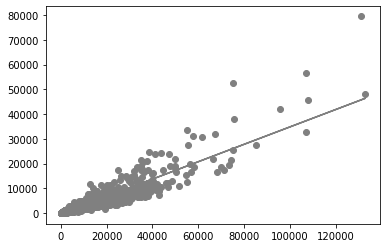

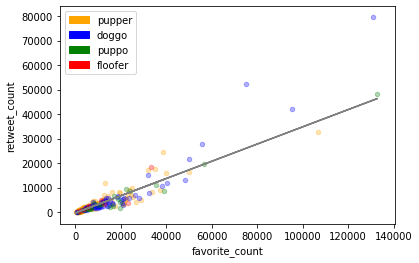

In [230]:
# Create a (sub)database of only attributes I care about 
df = df_clean_final[['retweet_count', 'favorite_count', 'dog_stage']]

# limit number for testing
# df=df.iloc[0:1000]

# Create linear line of best fit of all data points
y, x = df.retweet_count, df.favorite_count
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope*x+intercept
plt.plot(x, y, 'o', x, line, color='gray')

print('Line Equation: retweets = ({})*favorites + {}'.format(slope,intercept))
print('Correlation of line of best fit: {}'.format(r_value))

#####


# Create separate databases for each dog stage (don't count mutliple classifications)
df_puppers = df[df['dog_stage'] == 'pupper']
df_puppo = df[df['dog_stage'] == 'puppo']
df_doggo = df[df['dog_stage'] == 'doggo']
df_floofer = df[df['dog_stage'] == 'floofer']
df_none = df[df['dog_stage'] == 'None']



# Plot all data to see general shape
bx = df_puppers.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Orange', alpha=0.3)
df_doggo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Blue', ax=bx, alpha=0.3)
df_puppo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Green', ax=bx, alpha=0.3)
df_floofer.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Red', ax=bx, alpha=0.3)


# Legend
puppers = mpatches.Patch(label='pupper', color = 'Orange')
doggo = mpatches.Patch(label='doggo', color = 'Blue')
puppo = mpatches.Patch(label='puppo', color = 'Green')
floofer = mpatches.Patch(label='floofer', color = 'Red')

plt.legend(handles=[puppers, doggo, puppo, floofer])
plt.plot(x, line, color='gray')

plt.show()

We first created a scatterplot of all tweets (many tweets have no dog stage specified) as well as a linear line of best. Note that the relationship may be more complicated and not necessarily linear but this is to give us a general idea of our data relationship. 

We can observe that in our initial plot that most of the tweets have less than 40,000 favorites and less than 20,000 favorites. We also notice that from the equation for the line of best fit that there tends to be 3 times as many favorites as retweets. However we notice that as the values get larger, the ratio of retweets to favorites get larger (further above the line of best fit).

When we highlight the dog stages (ignoring those that were not classified), we see the smaller values bunch below the original line of best fit. We will have to zoom in to this area to better see observe the differences between different dog stages. 


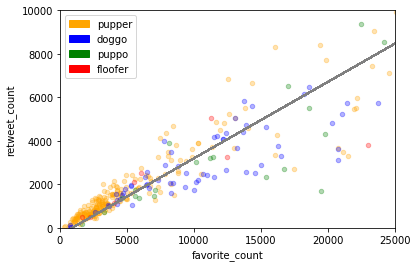

In [231]:
# Zoom into where most data resides
xlim = (0, 25000)
ylim = (0, 10000)

# Recreate the same plot (but now it will be zoomed in)
ax = df_puppers.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Orange', alpha=0.3, ylim=ylim, xlim=xlim)
df_doggo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Blue', ax=ax, alpha=0.3, ylim=ylim, xlim=xlim)
df_puppo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Green', ax=ax, alpha=0.3, ylim=ylim, xlim=xlim)
df_floofer.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Red', ax=ax, alpha=0.3, ylim=ylim, xlim=xlim)


plt.legend(handles=[puppers, doggo, puppo, floofer])
plt.plot(x, line, color='gray')

plt.show()


We zoomed in our plot and we can very quickly observe that there are more tweets classified as puppers than any other classification. We also notice that most puppers are lower valued and tend to have a higher ratio of retweets to favorites than the line of best fit. Next we notice that nearly every other classification tends to have a lower ratio of retweets to favorites (more favorites) than the puppers classification. This particularly apparent for doggo, the next most populous classification. We also notice that the tweets classified as doggos tend to have higher values compared to the pupper tweets which tend to have more lower values than higher values.


### Most Common Dog Breeds

Motivation: Which are the most common breeds? Are some dog breeds more common in tweets?

In [232]:
# Get attributes before determinig dog breed
attributes = ['retweet_count', 'favorite_count', 'rating_denominator', 'rating_numerator']
df_dog_breeds = df_clean_final[attributes].copy()

# Create rating column
def percent_rating(row):
    if row['rating_denominator'] == 0:
        return 0
    return row['rating_numerator']/row['rating_denominator']


df_dog_breeds['rating'] = df_dog_breeds.apply(percent_rating, axis=1)

In [233]:
# Get needed attributes for possible dog
attributes = ['p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog', 'p3_conf']
df_possible_breeds = df_clean_final[attributes].copy()

# Create default for breeds and confidence
df_possible_breeds['breed'] = ''
df_possible_breeds['breed_conf'] = 1

# For each entry, check which is the most likely breed
def best_breed_match(row):
    
    # Defaults to compare against
    breed = 'not_dog'
    confidence = 0
    
    # Only keep if it is a possible dog
    dog_preds = [(row[['p1', 'p1_dog', 'p1_conf']]), (row[['p2', 'p2_dog', 'p2_conf']]), (row[['p3', 'p3_dog', 'p3_conf']])]
    # Use this for easy reference
    index_breed, index_isDog, index_conf = 0,1,2
    
    for pred in dog_preds:
        # If it's a dog breed, check if it's max confidence seen
        if pred[index_isDog]:
            # save breed and confidence if higher confidence
            if pred[index_conf] >= confidence:
                breed = pred[index_breed]
                confidence = pred[index_conf]
    
    # Update breed list
    row['breed'] = breed
    row['breed_conf'] = confidence
    return row
        
    breeds = [row['p1'], row['p2'], row['p3']]
    
    
df_possible_breeds = df_possible_breeds.apply(best_breed_match, axis=1)

# Save info into dog breed dataframe
df_dog_breeds['breed'] = df_possible_breeds['breed']

df_dog_breeds['breed_conf'] = df_possible_breeds['breed_conf']

In [234]:
# show 30 most common dog breeds
df_dog_breeds.breed.value_counts()[:30] # 'not_dog' is most common so keep this out of plot

not_dog                           488
golden_retriever                  158
labrador_retriever                108
pembroke                           95
chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
pomeranian                         42
samoyed                            42
malamute                           33
french_bulldog                     31
chesapeake_bay_retriever           31
cocker_spaniel                     30
miniature_pinscher                 25
eskimo_dog                         22
staffordshire_bullterrier          21
cardigan                           21
german_shepherd                    21
siberian_husky                     20
shih-tzu                           20
beagle                             20
rottweiler                         19
shetland_sheepdog                  19
maltese_dog                        19
kuvasz                             18
lakeland_ter

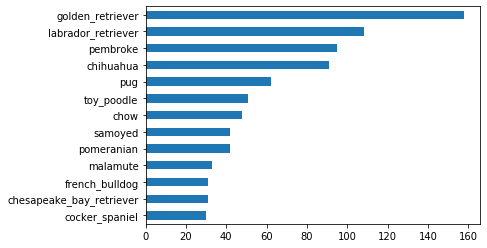

In [235]:
# Plot the 12 most common dog breeds in bar chart
only_dogs = df_dog_breeds['breed'] != 'not_dog'
df_dog_breeds[only_dogs].breed.value_counts()[12::-1].plot(kind='barh')

We first look at the count of the first 30 most common dog breeds. We see that nearly 500 tweets were classified as not a dog, which is about 3 times more than the first actual dog breed. This could be that many tweets from this ratings archive are not dogs, however this seems strange unlikely. It is possible that the image predictions has misclassified many of the images as not dogs. This seems more likely especially considering that the data comes from an image predictor code which could have made significant mistakes.

We next plotted the 12 most common (actual) dog breeds in a bar chart. We see that according to this data, the most common dog breed in the tweets was the golden retriever with over 150 tweets of the dog breed. The next four most common breeds, in descending order, were the labrador retrieve, the pembrooke (corgi), chihuahua, and the pug. The top three breeds seem to fit well with my general internet usage and experience on seeing different images of dogs. 

However, we should again be careful concluding too much from that data since we are relying on the image prediction code to inform us of the dog breed. It is possible that certain dog breeds were harder to determine by the prediction code and should acutally be higher in the list. In future investigations, the effectiveness of the image prediction data could be tested more throughly to ensure this data accurately reflects the different dog breeds.

### Most common Dog Stage

In [236]:
df_most_comm = df['dog_stage'].value_counts()[1:]

Text(0.5, 1.0, 'Most common Stage of Dog')

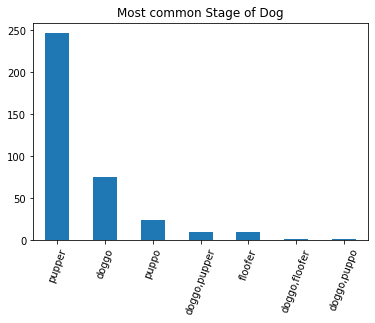

In [237]:
#sns.barplot(data=df_most_comm)
df_most_comm.plot(kind='bar')
plt.xticks(rotation=70);
plt.title('Most common Stage of Dog')

Pupper is the most common dog stage among all the dogs.